In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Importing the Dataset

In [3]:
import os
uber_df = pd.read_csv(r'C:\Users\mothi\Downloads\Uber datasets\uber-raw-data-janjune-15.csv')

In [4]:
uber_df

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90
...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186
14270475,B02765,2015-05-08 15:43:00,B02765,263
14270476,B02765,2015-05-08 15:43:00,B02765,90
14270477,B02765,2015-05-08 15:44:00,B01899,45


In [5]:
uber_df.describe()

,locationID
count,1.427048e+07
mean,1.520574e+02
std,7.159620e+01
min,1.000000e+00
25%,9.200000e+01
50%,1.570000e+02
75%,2.300000e+02
max,2.650000e+02


In [6]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14270479 entries, 0 to 14270478
Data columns (total 4 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Dispatching_base_num  object
 1   Pickup_date           object
 2   Affiliated_base_num   object
 3   locationID            int64 
dtypes: int64(1), object(3)
memory usage: 435.5+ MB


In [7]:
uber_df['Pickup_date'] = pd.to_datetime(uber_df['Pickup_date'], format = '%Y/%m/%d %H:%M:%S')

In [8]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14270479 entries, 0 to 14270478
Data columns (total 4 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Dispatching_base_num  object        
 1   Pickup_date           datetime64[ns]
 2   Affiliated_base_num   object        
 3   locationID            int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 435.5+ MB


In [9]:
uber_df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


##  Creating Month, Weekday, Day, Hour and Minutes column

In [10]:
uber_df['Day'] = uber_df['Pickup_date'].dt.day
uber_df['Weekday'] = uber_df['Pickup_date'].dt.day_name()
uber_df['Month'] = uber_df['Pickup_date'].dt.month
uber_df['Month Name'] = uber_df['Pickup_date'].dt.month_name()
uber_df['Hour'] = uber_df['Pickup_date'].dt.hour
uber_df['Minutes'] = uber_df['Pickup_date'].dt.minute

In [11]:
uber_df

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Day,Weekday,Month,Month Name,Hour,Minutes
0,B02617,2015-05-17 09:47:00,B02617,141,17,Sunday,5,May,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,17,Sunday,5,May,9,47
2,B02617,2015-05-17 09:47:00,B02617,100,17,Sunday,5,May,9,47
3,B02617,2015-05-17 09:47:00,B02774,80,17,Sunday,5,May,9,47
4,B02617,2015-05-17 09:47:00,B02617,90,17,Sunday,5,May,9,47
...,...,...,...,...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,8,Friday,5,May,15,43
14270475,B02765,2015-05-08 15:43:00,B02765,263,8,Friday,5,May,15,43
14270476,B02765,2015-05-08 15:43:00,B02765,90,8,Friday,5,May,15,43
14270477,B02765,2015-05-08 15:44:00,B01899,45,8,Friday,5,May,15,44


## Sorting the dataset by Pickup Date Column

In [12]:
uber_df.sort_values(by = 'Pickup_date', inplace = True)

## Analysing Uber Pickups each month

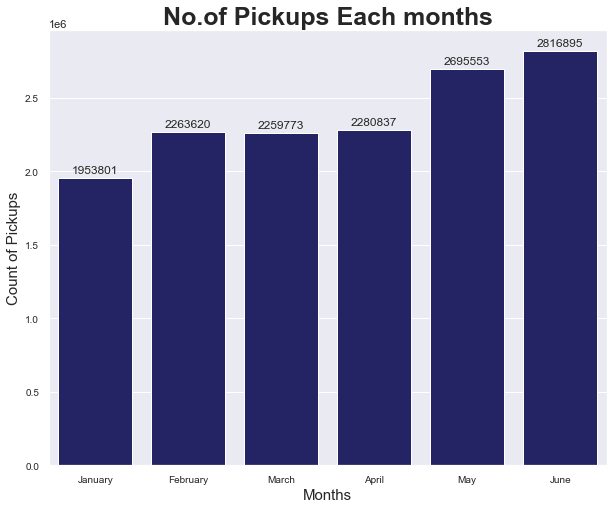

In [13]:
plt.figure(figsize = (10,8))

plot = sns.countplot(x = uber_df['Month Name'], color = 'midnightblue')

for bar in plot.patches:
    plt.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, 
                bar.get_height()), va='center', ha='center', 
                xytext = (0, 8), size = 12, textcoords = 'offset points')
    
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Count of Pickups', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('No.of Pickups Each months', fontsize = 25, fontweight = 'bold')

plt.show()

## Analysing Uber Pickups each Hour

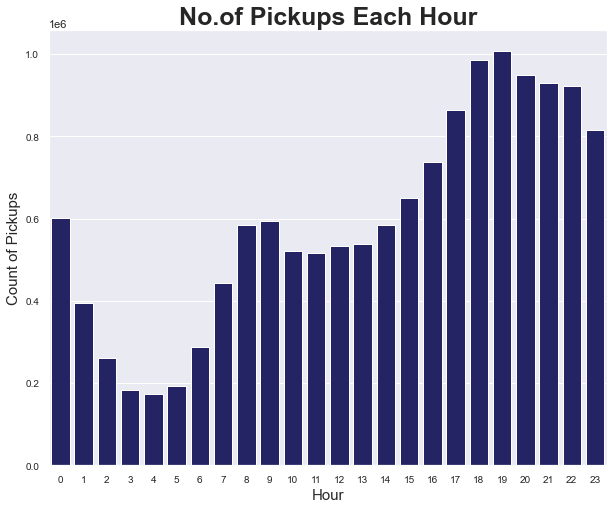

In [14]:
plt.figure(figsize = (10,8))

plot = sns.countplot(x = uber_df['Hour'], color = 'midnightblue')
    
plt.xlabel('Hour', fontsize = 15)
plt.ylabel('Count of Pickups', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('No.of Pickups Each Hour', fontsize = 25, fontweight = 'bold')

plt.show()

## Analysing Uber pickups each Hour for Weekday

In [15]:
weekday_df = uber_df.groupby(['Weekday', 'Hour']) ['Pickup_date'].count().reset_index()
weekday_df

,Weekday,Hour,Pickup_date
0,Friday,0,85939
1,Friday,1,46616
2,Friday,2,28102
3,Friday,3,19518
4,Friday,4,23575
...,...,...,...
163,Wednesday,19,143751
164,Wednesday,20,136003
165,Wednesday,21,133993
166,Wednesday,22,127026


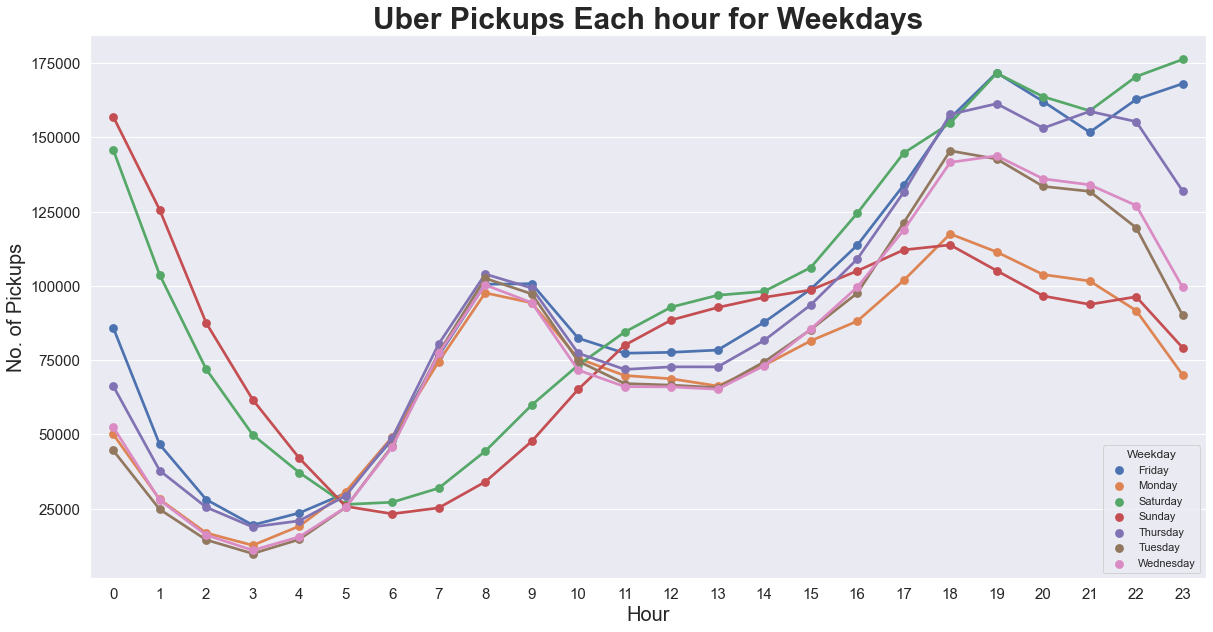

In [18]:
plt.figure(figsize = (20,10))

sns.pointplot(x = weekday_df['Hour'], y = weekday_df['Pickup_date'], hue = weekday_df['Weekday'])

plt.xlabel('Hour', fontsize = 20)
plt.ylabel('No. of Pickups', fontsize = 20)
plt.title('Uber Pickups Each hour for Weekdays', fontsize = 30, fontweight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()